In [1]:
from __future__ import print_function
from tpot import  TPOTClassifier
from tpot import  TPOTRegressor
from sklearn.model_selection import train_test_split
import sys,tempfile, urllib, os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [16]:
train = pd.read_csv('D:\Study Time\Hackerearth\Air Pollution\dataset\\train.csv') 
test = pd.read_csv('D:\Study Time\Hackerearth\Air Pollution\dataset\\test.csv')

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [4]:
le.fit(train.weather_type.unique())
train.loc[:,'weather_type'] = le.fit_transform(train.loc[:,'weather_type'])
test.loc[:,'weather_type'] = le.fit_transform(test.loc[:,'weather_type'])

In [5]:
le.fit(train.is_holiday.unique())
train.loc[:,'is_holiday'] = le.fit_transform(train.loc[:,'is_holiday']) 
test.loc[:,'is_holiday'] = le.fit_transform(test.loc[:,'is_holiday']) 

In [6]:
train.is_holiday = train.is_holiday.astype('category')
test.is_holiday = test.is_holiday.astype('category')
train.weather_type = train.weather_type.astype('category')
test.weather_type = test.weather_type.astype('category')

In [7]:
train.corr()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume
humidity,1.000000,-0.147042,-0.046268,0.005510,0.005510,0.033273,-0.012161,0.016625,0.014520,-0.000277,0.016455
wind_speed,-0.147042,1.000000,0.191320,-0.005160,-0.005160,-0.052856,0.001165,-0.006534,-0.004456,-0.004166,0.016329
wind_direction,-0.046268,0.191320,1.000000,0.000716,0.000716,-0.045843,0.002230,0.000321,0.020392,0.000749,0.014278
visibility_in_miles,0.005510,-0.005160,0.000716,1.000000,1.000000,0.000760,-0.008301,0.001453,-0.001582,0.003499,0.001348
dew_point,0.005510,-0.005160,0.000716,1.000000,1.000000,0.000760,-0.008301,0.001453,-0.001582,0.003499,0.001348
temperature,0.033273,-0.052856,-0.045843,0.000760,0.000760,1.000000,0.011071,-0.020721,-0.121334,0.005368,0.127871
rain_p_h,-0.012161,0.001165,0.002230,-0.008301,-0.008301,0.011071,1.000000,-0.000159,0.005206,0.000443,0.005642
snow_p_h,0.016625,-0.006534,0.000321,0.001453,0.001453,-0.020721,-0.000159,1.000000,0.032591,0.007227,0.001197
clouds_all,0.014520,-0.004456,0.020392,-0.001582,-0.001582,-0.121334,0.005206,0.032591,1.000000,-0.008541,0.037922
air_pollution_index,-0.000277,-0.004166,0.000749,0.003499,0.003499,0.005368,0.000443,0.007227,-0.008541,1.000000,-0.003751


In [8]:
train.drop('visibility_in_miles', inplace=True, axis=1)
test.drop('visibility_in_miles', inplace=True, axis=1)

In [9]:
scaler = MinMaxScaler()
scaler.fit(train.drop(['air_pollution_index', 'date_time'], axis = 1))
train_n = scaler.transform(train.drop(['air_pollution_index', 'date_time'], axis = 1))

In [10]:
scaler = MinMaxScaler()
scaler.fit(test.drop(['date_time'], axis = 1))
test_n = scaler.transform(test.drop(['date_time'], axis = 1))

In [11]:
train_n = np.array(train_n)
train_norm = pd.DataFrame(train_n, columns=train.columns.drop(['air_pollution_index', 'date_time']))

In [12]:
test_n = np.array(test_n)
test_norm = pd.DataFrame(test_n, columns=test.columns.drop(['date_time']))

In [13]:
train.columns

Index(['date_time', 'is_holiday', 'humidity', 'wind_speed', 'wind_direction',
       'dew_point', 'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all',
       'weather_type', 'air_pollution_index', 'traffic_volume'],
      dtype='object')

In [14]:
train_norm_merge = train_norm
train_norm_merge['air_pollution_index'] = train['air_pollution_index']

In [15]:
train_norm_merge.head()

,is_holiday,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume,air_pollution_index
0,0.636364,0.873563,0.1250,0.913889,0.000,0.935245,0.0,0.0,0.40,0.1,0.761676,121
1,0.636364,0.620690,0.1875,0.916667,0.000,0.938749,0.0,0.0,0.75,0.1,0.620330,178
2,0.636364,0.609195,0.1875,0.913889,0.125,0.939463,0.0,0.0,0.90,0.1,0.654808,113
3,0.636364,0.609195,0.1875,0.913889,0.500,0.941247,0.0,0.0,0.90,0.1,0.690385,20
4,0.636364,0.597701,0.1875,0.913889,0.750,0.944524,0.0,0.0,0.75,0.1,0.675549,281


In [16]:
# AUtoViml

In [17]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.504. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='GS',feature_reduction=True,
                             Boosting_Flag=None,Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=0)
            
To remove previous versions, perform 'pip uninstall autoviml'
To get the latest version, perform "pip install autoviml --no-cache-dir --ignore-installed"


In [18]:
train_df = train_norm_merge
test_df = test_norm

Train (Size: 33750,12) has Single_Label with target: ['air_pollution_index']
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  11
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
No GPU available on this device
#############     D A T A    P R E P A R A T I O N     #############
No Missing Values in train data set
Test data has no missing values. Continuing...
Completed Sc

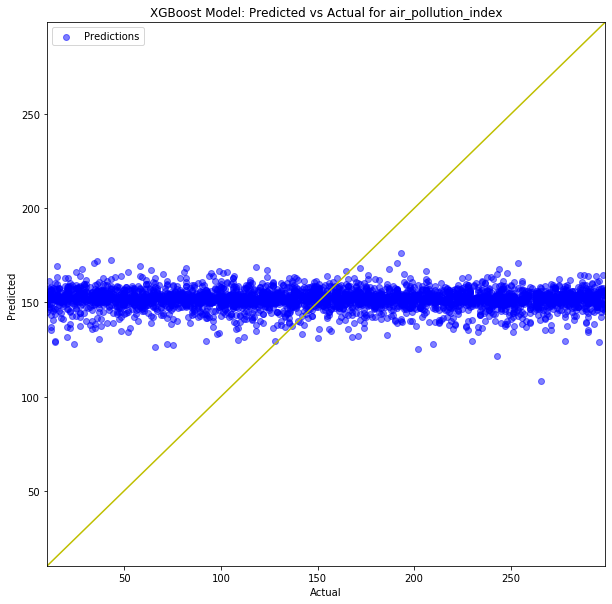

    MAE = 72.5038
    MAPE = 113%
    RMSE = 84.1011
    MAE as % std dev of Actuals = 86.6%
    Normalized RMSE (% of MinMax of Actuals) = 29%
    Normalized RMSE (% of Std Dev of Actuals) = 100%
################# E N S E M B L E  M O D E L  ##################
Based on trying multiple models, Best type of algorithm for this data set is LassoLarsCV
#############################################################################


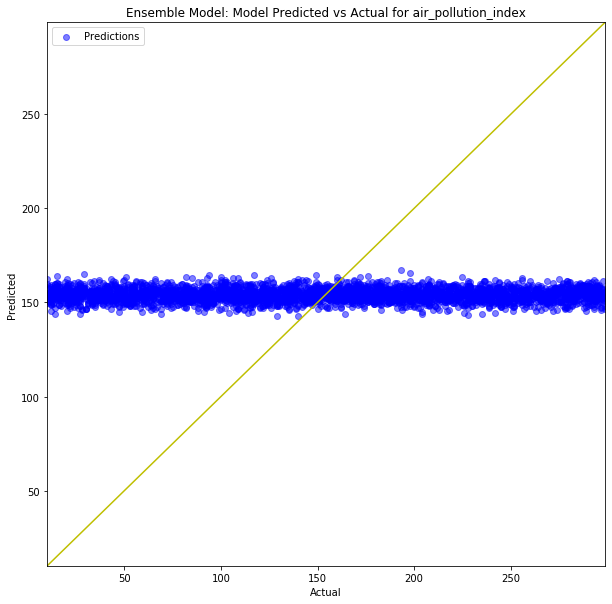

    MAE = 72.2972
    MAPE = 115%
    RMSE = 83.7988
    MAE as % std dev of Actuals = 86.4%
    Normalized RMSE (% of MinMax of Actuals) = 29%
    Normalized RMSE (% of Std Dev of Actuals) = 100%
After multiple models, Ensemble Model Results:
    RMSE Score = 83.79884
#############################################################################
Ensembling Models is better than Single Model for this data set.


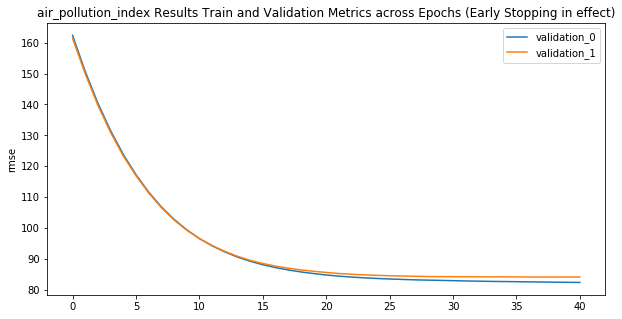

    Time taken for this Target (in seconds) = 47
Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T  #################
    Time taken for this Target (in seconds) = 48
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin
Actual Training time taken in seconds = 5
Completed Ensemble predictions on held out data
    Saving predictions to .\air_pollution_index\air_pollution_index_Regression_test_modified.csv
    Saving predictions to .\air_pollution_index\air_pollution_index_Regression_submission.csv
    Saving predictions to .\air_pollution_index\air_pollution_index_Regression_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 1.2 for the Entire Process


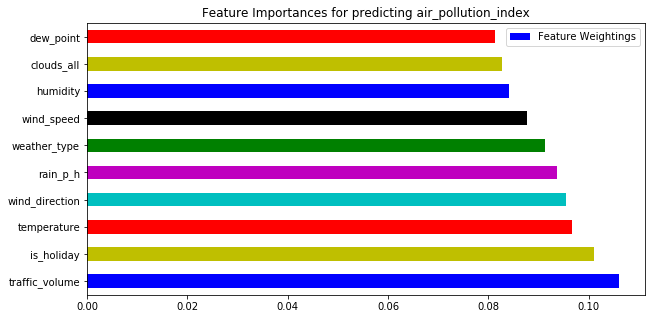

In [19]:
model, features, trainm, testm = Auto_ViML(train_df, 'air_pollution_index', test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

In [20]:
testm

,temperature,traffic_volume,wind_direction,rain_p_h,snow_p_h,dew_point,humidity,clouds_all,weather_type,is_holiday,wind_speed,air_pollution_index_LassoLarsCV_predictions,air_pollution_index_LassoCV_predictions,air_pollution_index_RidgeCV_predictions,air_pollution_index_Bagging2_predictions,air_pollution_index_XGBoost_predictions,air_pollution_index_Ensembled_predictions,air_pollution_index_predictions
0,0.610138,0.070093,0.075000,0.0,0.0,0.375,0.588889,0.978261,0.666667,0.636364,0.0625,154.841422,154.283439,151.572443,152.55,132.659592,149.181379,149.181379
1,0.610138,0.070093,0.075000,0.0,0.0,0.375,0.588889,0.978261,0.555556,0.636364,0.0625,154.841422,154.283439,151.613288,150.60,132.659592,148.799548,148.799548
2,0.610138,0.070093,0.000000,0.0,0.0,0.000,0.511111,0.978261,0.222222,0.636364,0.0625,154.841422,154.283439,151.384870,151.56,117.922485,145.998443,145.998443
3,0.604506,0.028604,0.975000,0.0,0.0,0.125,0.511111,0.978261,0.666667,0.636364,0.0625,154.841422,154.283439,151.918058,158.69,151.760391,154.298662,154.298662
4,0.604506,0.028604,0.975000,0.0,0.0,0.000,0.511111,0.978261,0.555556,0.636364,0.0625,154.841422,154.283439,151.846951,158.91,147.613693,153.499101,153.499101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14449,0.583542,0.480317,0.958333,0.0,0.0,0.375,0.122222,0.815217,0.111111,0.636364,0.2500,154.841422,154.475503,151.454405,142.90,126.119942,145.958254,145.958254
14450,0.572747,0.372416,0.777778,0.0,0.0,0.625,0.944444,0.978261,0.111111,0.636364,0.5000,154.841422,154.283439,150.311690,160.91,147.542023,153.577715,153.577715
14451,0.572278,0.284339,0.661111,0.0,0.0,0.000,0.588889,0.978261,1.000000,0.636364,0.2500,154.841422,154.283439,150.306873,172.87,140.238419,154.508031,154.508031
14452,0.562265,0.183942,0.744444,0.0,0.0,0.750,0.522222,0.978261,0.111111,0.636364,0.5000,154.841422,154.283439,150.700599,185.11,142.086899,157.404472,157.404472


Train (Size: 33750,12) has Single_Label with target: ['air_pollution_index']
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  11
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
No GPU available on this device
#############     D A T A    P R E P A R A T I O N     #############
No Missing Values in train data set
Test data has no missing values. Continuing...
Completed Sc

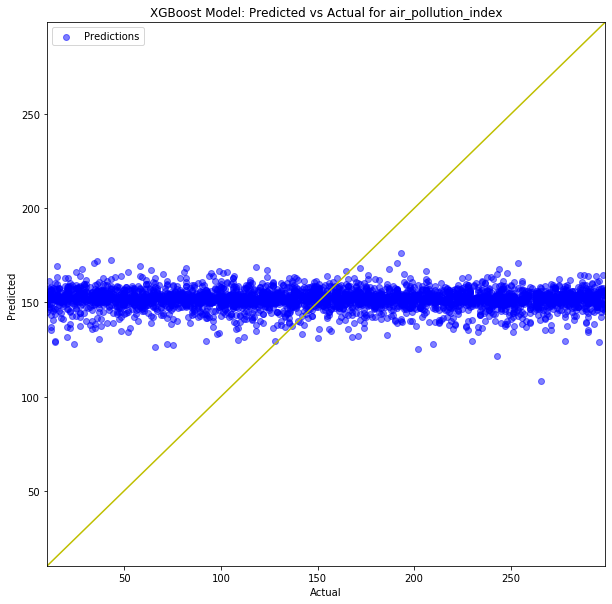

    MAE = 72.5038
    MAPE = 113%
    RMSE = 84.1011
    MAE as % std dev of Actuals = 86.6%
    Normalized RMSE (% of MinMax of Actuals) = 29%
    Normalized RMSE (% of Std Dev of Actuals) = 100%
################# E N S E M B L E  M O D E L  ##################
Based on trying multiple models, Best type of algorithm for this data set is LassoLarsCV
#############################################################################


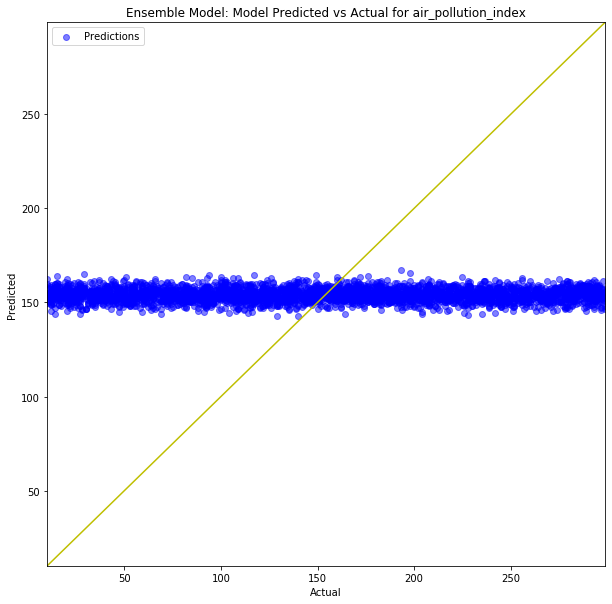

    MAE = 72.2972
    MAPE = 115%
    RMSE = 83.7988
    MAE as % std dev of Actuals = 86.4%
    Normalized RMSE (% of MinMax of Actuals) = 29%
    Normalized RMSE (% of Std Dev of Actuals) = 100%
After multiple models, Ensemble Model Results:
    RMSE Score = 83.79884
#############################################################################
Ensembling Models is better than Single Model for this data set.


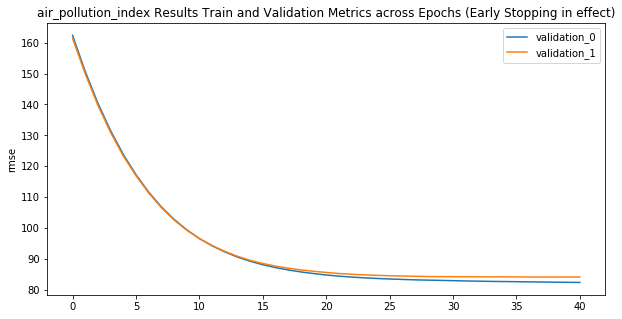

    Time taken for this Target (in seconds) = 47
Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T  #################
    Time taken for this Target (in seconds) = 49
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin
Actual Training time taken in seconds = 5
Completed Ensemble predictions on held out data
    Saving predictions to .\air_pollution_index\air_pollution_index_Regression_test_modified.csv
    Saving predictions to .\air_pollution_index\air_pollution_index_Regression_submission.csv
    Saving predictions to .\air_pollution_index\air_pollution_index_Regression_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 1.3 for the Entire Process


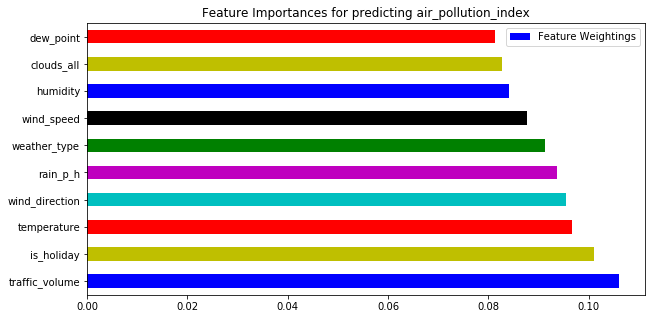

In [25]:
model1, features1, trainm1, testm1 = Auto_ViML(train_df, 'air_pollution_index', test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

In [26]:
testm1

,temperature,traffic_volume,wind_direction,rain_p_h,snow_p_h,dew_point,humidity,clouds_all,weather_type,is_holiday,wind_speed,air_pollution_index_LassoLarsCV_predictions,air_pollution_index_LassoCV_predictions,air_pollution_index_RidgeCV_predictions,air_pollution_index_Bagging2_predictions,air_pollution_index_XGBoost_predictions,air_pollution_index_Ensembled_predictions,air_pollution_index_predictions
0,0.610138,0.070093,0.075000,0.0,0.0,0.375,0.588889,0.978261,0.666667,0.636364,0.0625,154.841422,154.283439,151.572443,152.55,132.659592,149.181379,149.181379
1,0.610138,0.070093,0.075000,0.0,0.0,0.375,0.588889,0.978261,0.555556,0.636364,0.0625,154.841422,154.283439,151.613288,150.60,132.659592,148.799548,148.799548
2,0.610138,0.070093,0.000000,0.0,0.0,0.000,0.511111,0.978261,0.222222,0.636364,0.0625,154.841422,154.283439,151.384870,151.56,117.922485,145.998443,145.998443
3,0.604506,0.028604,0.975000,0.0,0.0,0.125,0.511111,0.978261,0.666667,0.636364,0.0625,154.841422,154.283439,151.918058,158.69,151.760391,154.298662,154.298662
4,0.604506,0.028604,0.975000,0.0,0.0,0.000,0.511111,0.978261,0.555556,0.636364,0.0625,154.841422,154.283439,151.846951,158.91,147.613693,153.499101,153.499101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14449,0.583542,0.480317,0.958333,0.0,0.0,0.375,0.122222,0.815217,0.111111,0.636364,0.2500,154.841422,154.475503,151.454405,142.90,126.119942,145.958254,145.958254
14450,0.572747,0.372416,0.777778,0.0,0.0,0.625,0.944444,0.978261,0.111111,0.636364,0.5000,154.841422,154.283439,150.311690,160.91,147.542023,153.577715,153.577715
14451,0.572278,0.284339,0.661111,0.0,0.0,0.000,0.588889,0.978261,1.000000,0.636364,0.2500,154.841422,154.283439,150.306873,172.87,140.238419,154.508031,154.508031
14452,0.562265,0.183942,0.744444,0.0,0.0,0.750,0.522222,0.978261,0.111111,0.636364,0.5000,154.841422,154.283439,150.700599,185.11,142.086899,157.404472,157.404472


In [17]:
#H2o
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from C:\Users\suraj\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\suraj\AppData\Local\Temp\tmpd6cg7f5o
  JVM stdout: C:\Users\suraj\AppData\Local\Temp\tmpd6cg7f5o\h2o_Suraj_started_from_python.out
  JVM stderr: C:\Users\suraj\AppData\Local\Temp\tmpd6cg7f5o\h2o_Suraj_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,2 months and 15 days
H2O cluster name:,H2O_from_python_Suraj_g4rbc7
H2O cluster total nodes:,1
H2O cluster free memory:,3.980 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [18]:
hdf_o = h2o.H2OFrame(train)
# hdf.head()
test_hdf = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [19]:
hdfo_train,hdfo_test,hdfo_valid = hdf_o.split_frame(ratios=[.7, .15])

In [20]:
x = hdfo_train.columns
y = 'air_pollution_index'

In [21]:
aml = H2OAutoML(max_models = 50, max_runtime_secs=3600, seed = 11, nfolds = 5)
aml.train(x = x, y = y, training_frame = hdfo_train, validation_frame = hdfo_valid)

AutoML progress: |
14:14:07.85: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
14:14:07.91: AutoML: XGBoost is not available; skipping it.

█████████████████████████Failed polling AutoML progress log: HTTP 500 Server Error:
Server error java.lang.ArrayIndexOutOfBoundsException:
  Error: Index 47 out of bounds for length 47
  Request: None

███████████████████████████████| 100%| 100%


In [52]:
hdf = h2o.H2OFrame(train_norm_merge)
# hdf.head()
test_hdf = h2o.H2OFrame(test_norm)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [53]:
hdf_train,hdf_test,hdf_valid = hdf.split_frame(ratios=[.7, .15])

In [54]:
x = hdf_train.columns
y = 'air_pollution_index'

In [60]:
aml = H2OAutoML(max_models = 30, max_runtime_secs=1200, seed = 1, nfolds = 2)
aml.train(x = x, y = y, training_frame = hdf_train, validation_frame = hdf_valid)

AutoML progress: |
01:16:29.13: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
01:16:29.13: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [22]:
lb = aml.leaderboard
lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DeepLearning_grid__3_AutoML_20200421_141407_model_2,7046.42,83.9429,7046.42,72.7739,0.794934
GLM_1_AutoML_20200421_141407,7046.68,83.9445,7046.68,72.7672,0.795364
GBM_grid__1_AutoML_20200421_141407_model_8,7047.1,83.947,7047.1,72.769,0.79537
StackedEnsemble_BestOfFamily_AutoML_20200421_141407,7047.52,83.9495,7047.52,72.7722,0.795337
DeepLearning_grid__2_AutoML_20200421_141407_model_3,7047.62,83.9501,7047.62,72.774,0.796465
StackedEnsemble_AllModels_AutoML_20200421_141407,7047.76,83.9509,7047.76,72.7729,0.795403
GBM_grid__1_AutoML_20200421_141407_model_6,7048.88,83.9576,7048.88,72.7779,0.795434
DeepLearning_grid__2_AutoML_20200421_141407_model_2,7049.88,83.9635,7049.88,72.7855,0.796707
GBM_grid__1_AutoML_20200421_141407_model_7,7051.61,83.9739,7051.61,72.7893,0.7955
DeepLearning_grid__2_AutoML_20200421_141407_model_5,7052.94,83.9818,7052.94,72.8016,0.796591


In [23]:
preds_h2o = aml.leader.predict(test_hdf)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [24]:
pred_h2o = preds_h2o.as_data_frame()

In [25]:
pred_h2o['predict']

0       -231.882206
1       -231.477004
2       -233.795761
3       -230.583267
4       -231.522703
            ...    
14449   -228.289956
14450   -234.046778
14451   -233.937407
14452   -232.183780
14453   -233.601917
Name: predict, Length: 14454, dtype: float64

In [84]:
X_train = train_norm_merge
y_train = X_train.pop('air_pollution_index')

In [89]:
X_train.columns

Index(['is_holiday', 'humidity', 'wind_speed', 'wind_direction',
       'visibility_in_miles', 'dew_point', 'temperature', 'rain_p_h',
       'snow_p_h', 'clouds_all', 'weather_type', 'traffic_volume'],
      dtype='object')

In [90]:
from tpot import TPOTRegressor

In [91]:
# tpot =  TPOTClassifier(generations=3, population_size=10, verbosity=3)
# tpot.fit(X_train, y_train)
# # print(tpot.score(X_test, y_test))

tpot =  TPOTRegressor(generations=10, population_size=100, verbosity=3)
tpot.fit(X_train, y_train)
# tpot.fit(train_norm_merge.drop(['air_pollution_index'], axis = 1), train_norm_merge['air_pollution_index'])
# print(tpot.score(X_test, y_test))

30 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['is_holiday', 'humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type', 'traffic_volume'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']
expected visibility_in_miles, humidity, wind_direction, is_holiday, clouds_all, temperature, weather_type, snow_p_h, rain_p_h, traffic_volume, wind_speed, dew_point in input data
training data did not have the following fields: f6, f3, f11, f5, f2, f7, f9, f4, f0, f1, f8, f10.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=1 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _ra

training data did not have the following fields: f6, f3, f11, f5, f2, f7, f9, f4, f0, f1, f8, f10.
_pre_test decorator: _random_mutation_operator: num_test=0 l2 was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['is_holiday', 'humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type', 'traffic_volume'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']
expected visibility_in_miles, humidity, wind_direction, is_holiday, clouds_all, temperature, weather_type, snow_p_h, rain_p_h, traffic_volume, wind_speed, dew_point in input data
training data did not have the following fields: f6, f3, f11, f5, f2, f7, f9, f4, f0, f1, f8, f10.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_op

training data did not have the following fields: f6, f3, f11, f5, f2, f7, f9, f4, f0, f1, f8, f10.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 55.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Skipped pipeline #884 due to time out. Continuing to the next pipeline.
Generation 8 - Current Pareto front scores:
-1	-7011.7719141678335	AdaBoostRegressor(input_matrix, AdaBoostRegressor__learning_rate=0.5, AdaBoostRegressor__loss=square, AdaBoostRegressor__n_estimators=100)
-2	-7011.729973796901	RidgeCV(VarianceThreshold(input_matrix, VarianceThreshold__threshold=0.1))
-3	-7

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=10,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=3, warm_start=False)

In [92]:
tpot_pred = tpot.predict(test_norm)

In [93]:
tpot_pred

array([153.88805406, 153.88805406, 153.88805406, ..., 153.9272246 ,
       153.9272246 , 153.92083589])

In [70]:
test_norm.head()

,is_holiday,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
0,0.636364,0.588889,0.0625,0.075,0.375,0.610138,0.0,0.0,0.978261,0.666667,0.070093
1,0.636364,0.588889,0.0625,0.075,0.375,0.610138,0.0,0.0,0.978261,0.555556,0.070093
2,0.636364,0.511111,0.0625,0.000,0.000,0.610138,0.0,0.0,0.978261,0.222222,0.070093
3,0.636364,0.511111,0.0625,0.975,0.125,0.604506,0.0,0.0,0.978261,0.666667,0.028604
4,0.636364,0.511111,0.0625,0.975,0.000,0.604506,0.0,0.0,0.978261,0.555556,0.028604


In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
rfc.feature_importances_

array([0.00058712, 0.14492568, 0.08879033, 0.1590058 , 0.09134201,
       0.18282039, 0.01861097, 0.00067442, 0.0694471 , 0.05924222,
       0.18455397])

In [13]:
x_test = test.drop('date_time', axis = 1)

In [14]:
rf_300_preds = rfc.predict(x_test)

In [49]:
from sklearn.svm import SVC
model = SVC()

In [46]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [50]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

In [48]:
pwd

'D:\\Study Time\\RA'

In [26]:
# Output Download
dicti = {}
dicti['date_time'] = test.date_time
dicti['air_pollution_index'] = np.array(pred_h2o['predict'])

out = pd.DataFrame(dicti)
out.to_csv('D:\Study Time\Hackerearth\Air Pollution\\preds_h2o_new_22.csv', index=False)